In [36]:
import h5py
import json
import os
import os.path as osp
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)

In [60]:
# load vg_atts.h5
data_h5 = h5py.File('../data/vg_objs.h5', 'r')

# load vg_imgs.h5
img_h5 = h5py.File('../data/vg_imgs.h5', 'r')

# load vg_atts.json
vg_atts = json.load(open('../data/vg_attributes_dicts.json', 'r'))

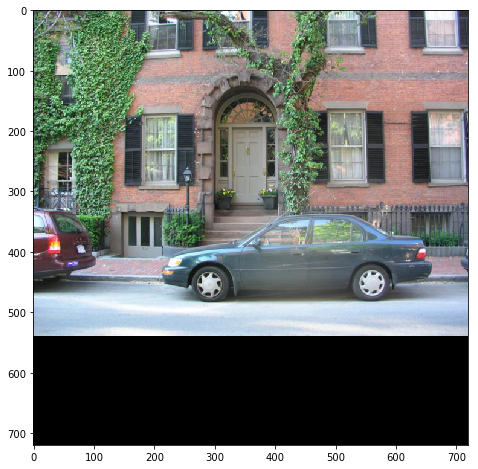

In [61]:
# check i-th image
img_idx = 101
img = img_h5['images'][img_idx]
img = img.transpose(1,2,0)
b = img[:,:,0].copy()
img[:,:,0] = img[:,:,2]
img[:,:,2] = b
plt.imshow(img)

In [62]:
# load its boxes
first_box = data_h5['img_to_first_box'][img_idx]-1
last_box = data_h5['img_to_last_box'][img_idx]
boxes = data_h5['boxes'][first_box:last_box]  # x+w/2, y+h/2, w, h
boxes[:,:2] = boxes[:,:2] - boxes[:,2:]/2  # x, y, w, h

# load its labels
labels = data_h5['labels'][first_box:last_box]

In [63]:
# decode labels
def decode_labels(seq, idx_to_token):
    """labels: int (m, 6)"""
    print(seq.shape)
    N, seq_length = seq.shape
    out = []
    for i in range(N):
        txt = ''
        for j in range(seq_length):
            ix = str(seq[i, j])
            if ix != '0':
                wd = idx_to_token[ix]
                if j >= 1:
                    txt += ' '
                txt += wd
            else:
                break
        out += [txt]
    return out

(1, 6)
[u'robe']


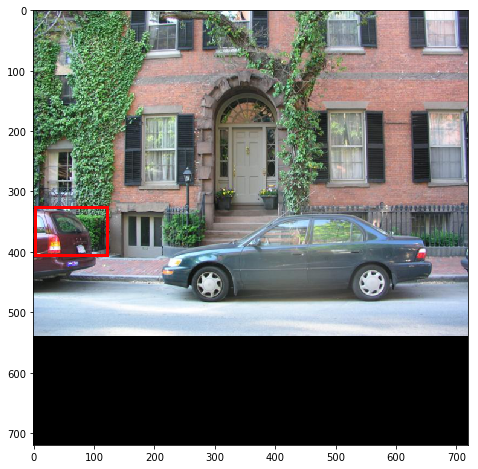

In [67]:
i = 12
print(decode_labels(labels[i:i+1], vg_atts['idx_to_token']))
ax = plt.gca()
ax.imshow(img)
box_plot = Rectangle((boxes[i,0], boxes[i,1]), boxes[i,2], boxes[i,3], fill=False, edgecolor='red', linewidth=3)
ax.add_patch(box_plot)
plt.show()